In [80]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
#reading the data as a dataframe 
insurance_data = pd.read_csv("insurance.csv")
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [82]:
#Perform basic EDA which should include the following and print out your insights at every step

In [83]:
# a. Shape of the data
insurance_data.shape

(1338, 7)

In [84]:
# the data has 1338 rows and 7 columns

In [85]:
# b. Data type of each attribute
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [86]:
# sex, smoker and region are categorical variables
# age, bmi and charges are quantitative, numerical variables
# though children is an integer it is a catergorical variable that describes the number of children of the insurance contractor

In [87]:
# c. Checking the presence of missing values
insurance_data[insurance_data.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


In [88]:
# there are no missing values in any of the columns

In [89]:
# d. 5 point summary of numerical attributes
# saving the numerical attributes as a separate table
insurance_num = insurance_data[["bmi","charges","age"]]
insurance_num.head(10)

,bmi,charges,age
0,27.900,16884.92400,19
1,33.770,1725.55230,18
2,33.000,4449.46200,28
3,22.705,21984.47061,33
4,28.880,3866.85520,32
5,25.740,3756.62160,31
6,33.440,8240.58960,46
7,27.740,7281.50560,37
8,29.830,6406.41070,37
9,25.840,28923.13692,60


In [90]:
# displaying the 5 point summary of numerical attributes
insurance_num.describe()

,bmi,charges,age
count,1338.000000,1338.000000,1338.000000
mean,30.663397,13270.422265,39.207025
std,6.098187,12110.011237,14.049960
min,15.960000,1121.873900,18.000000
25%,26.296250,4740.287150,27.000000
50%,30.400000,9382.033000,39.000000
75%,34.693750,16639.912515,51.000000
max,53.130000,63770.428010,64.000000


In [91]:
# inference drawn from the 5 point summary
# bmi - the data is fairly symmetrical and follows a normal distribution
# charges - the data doesn't follow a normal distribution and is skewed with a long tail to the right. 
# This implies that there are outliers who pay higher premium charges.
# age - the distribution is nearly bimodal and doesn't follow normal distribution

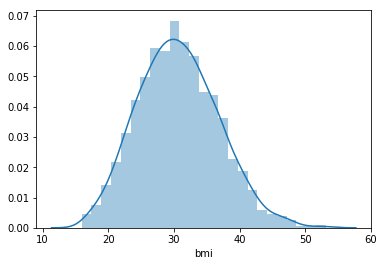

In [92]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. 
# Distribution of 'bmi'
sns.distplot(insurance_data['bmi'])

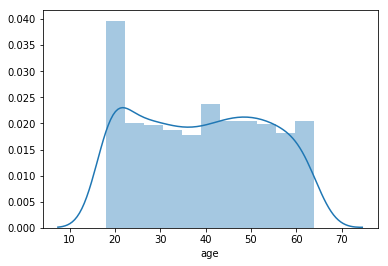

In [93]:
# Distribution of 'age'
sns.distplot(insurance_data['age'])

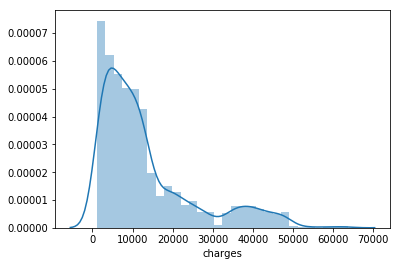

In [94]:
# Distribution of 'charges'
sns.distplot(insurance_data['charges'])

In [95]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 
insurance_num.skew()

bmi        0.284047
charges    1.515880
age        0.055673
dtype: float64

In [96]:
# Inference of measure of skewness. If the measure is near zero the data is nearly symmetric. 
# If the measure is positive the data is right skewed with a longer tail on the right
# If the measure is negative the data is left skewed with a longer tail on the left
# BMI - The distribution is nearly symmetric with a slightly longer tail to the right
# Charges - The distribution is right skewed with a longer tail to the right. This implies there are premium payers paying 
# significantly higher charges than the central modal value. This indicates the presence of outliers.
# Age - The measure of skewness is near zero. But as can be seen from the distplot above the distribution is not symmetric and 
# doesn't follow a normal distribution

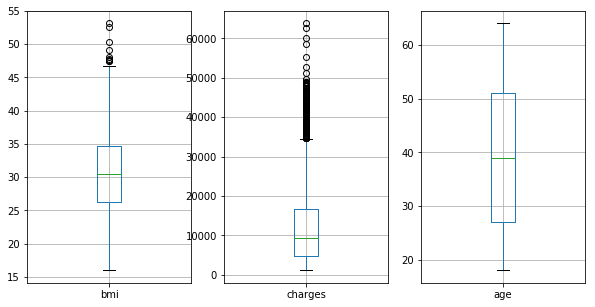

In [97]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 
fig, ax = plt.subplots(1, 3, figsize = (10,5))
insurance_data.boxplot('bmi', ax = ax[0])
insurance_num.boxplot('charges', ax = ax[1])
insurance_num.boxplot('age', ax = ax[2])

In [98]:
# inference - as can be seen from the box plots above 
# there are a few outliers in bmi where the premium payers have a higher bmi than 47
# Charges paid has significant number of outliers paying a higher premium than 38000
# the box plot for age doenst show any outliers. But as can be seen from the distplot above the distribution is not  
# symmetric and doesn't follow a normal distribution

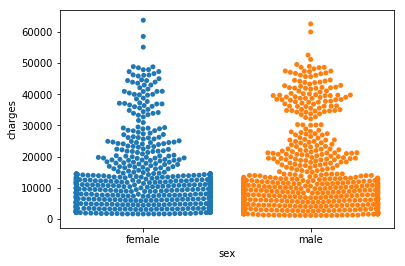

In [99]:
# h. Distribution of categorical columns (include children) smoker, region, children
# Distribution of categorical columns "sex"
sns.swarmplot(insurance_data['sex'],insurance_data['charges'])

In [100]:
# From the above chart it can be inferred that the charges paid doesn't differ signficantly by the sex of the insured
# Also there are relatively more men than women paying charges in the range of 30,000 to 50,000
# There are few outliers who pay premium more than 50,000.

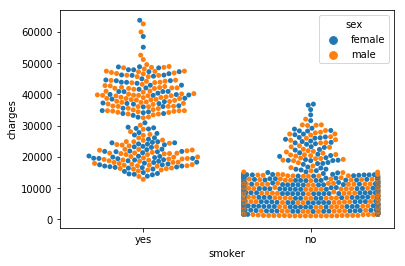

In [101]:
# Distribution of categorical columns "smoker"
sns.swarmplot(insurance_data['smoker'],insurance_data['charges'], hue = insurance_data['sex'])

In [102]:
# From the above chart it can be inferred that the minimum charge for smokers is approximately 11,000 where as for non smokers 
# it is 1,121. This implies there is a base risk premium charged for smokers.
# Also there are significant number of premium payers amount the smokers who pay a premium greater than 30,000 
# whereas there are very few outliers paying premium greater than 30,000 amoung non smokers

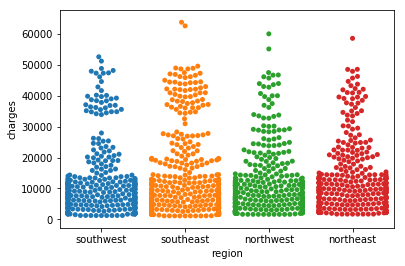

In [103]:
# Distribution of categorical columns "region"
sns.swarmplot(insurance_data['region'],insurance_data['charges'])

In [104]:
# The distribution of premium payers by region is fairly similar with majority of the charges paid across region falling between 
# 1000 to 15000 and a few premium payers falling in the 15000 to 30000 bracket
# There distribution of premium payers paying more than 30000 is significantly different across regions but the overall count
# of such premium payers is less

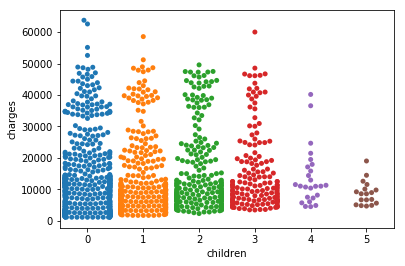

In [105]:
# Distribution of categorical columns "children"
sns.swarmplot(insurance_data['children'],insurance_data['charges'])

In [106]:
# From the above chart it can be inferred that the minimum premium charged increases marginally with the number of children
# Majority of the premium payers have no children
# Among the premium payers with children most of them are concentrated in the 1 to 3 children bucket and more than 3 children
# can be considered as outliers

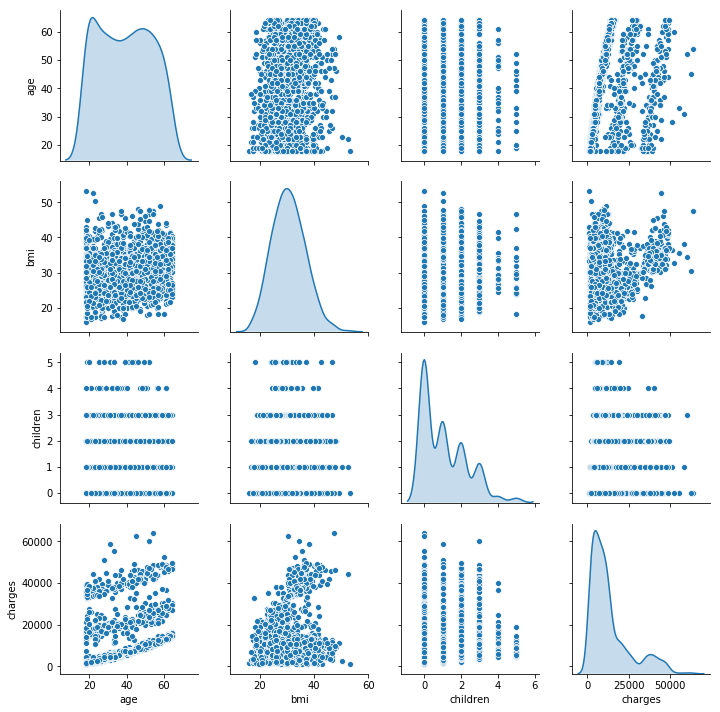

In [107]:
# i. Pair plot that includes all the columns of the data frame
sns.pairplot(insurance_data,diag_kind='kde')

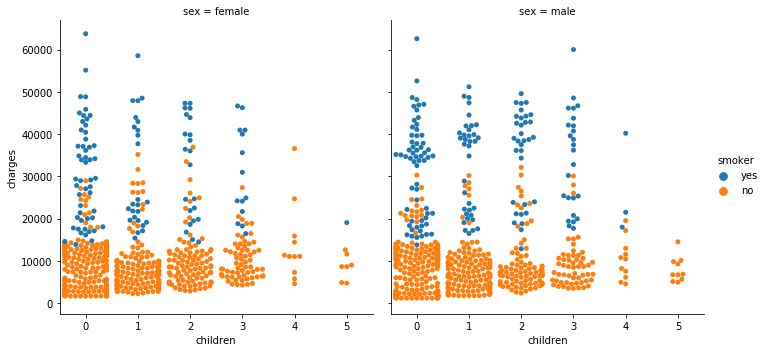

In [108]:
# i. Pair plot that includes all the columns of the data frame (using catplot for categorical variable)
sns.catplot(data = insurance_data, x = 'children', y = 'charges', col = 'sex', hue = 'smoker', kind = 'swarm')

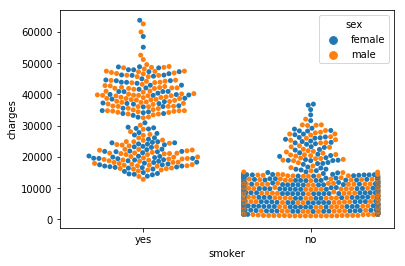

In [109]:
# 4.a. Do charges of people who smoke differ significantly from the people who don't? 
sns.swarmplot(insurance_data['smoker'],insurance_data['charges'], hue = insurance_data['sex'])

In [110]:
# From the above chart it can be inferred that the minimum charge for smokers is 10,000 where as for non smokers is 1,121
# This implies there is a base risk premium charged for smokers.
# Also there are significant number of premium payers amount the smokers who pay a premium greater than 30,000 
# whereas there are very few outliers paying premium greater than 30,000 amoung non smokers

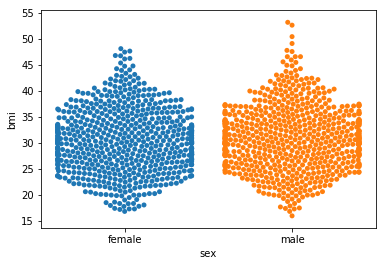

In [111]:
# 4.b. Does bmi of males differ significantly from that of females?
sns.swarmplot(insurance_data['sex'],insurance_data['bmi'] )

In [112]:
# The from the above chart the distribution of BMI among men and women is fairly similar.
# Majority of the men and women have a BMI of approximately 24 to 37
# There are a few outliers amoung men whose BMI is greater than 48

sex     female  male
smoker              
no         547   517
yes        115   159


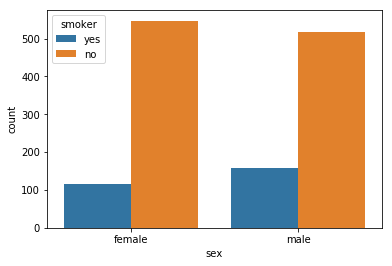

In [113]:
# 4.c. Is the proportion of smokers significantly different in different genders? 
# Number of non smokers vs smokers amoung men and women
insurance_count = insurance_data
insurance_count['one'] = 1
insurance_pivot = pd.pivot_table(insurance_count, values = 'one', index = 'smoker', columns = 'sex', aggfunc = "sum")
print(insurance_pivot)
sns.countplot(data = insurance_data, x='sex', hue = 'smoker')

In [114]:
# Composition of non smokers vs smokers amoung men and women 
female_smokers = 115/(547+115)*100
male_smokers = 159/(159+517)*100
print(female_smokers)
print(male_smokers)

17.371601208459214
23.5207100591716


In [115]:
# The proportion of smokers amoung men is 23.5% and amoung women it's 17.4%. The proportion of smokers amoung men is more by 6% 

In [116]:
# 4.d. Is the distribution of bmi across women with no children, one child and two children, the same ?
# creating subset for different class of women based on the number of children
# renaming the bmi column to get appropriate label in the kde plot

insurance_data_women = insurance_data[insurance_data["sex"] == "female"]
insurance_data_women.rename(columns={'bmi': 'bmi_women_overall'}, inplace = True)
insurance_data_women_no_children = insurance_data_women[insurance_data_women["children"] == 0]
insurance_data_women_no_children.rename(columns={'bmi_women_overall': 'bmi_women_no_children'}, inplace = True)
insurance_data_women_1_child = insurance_data_women[insurance_data_women["children"] == 1]
insurance_data_women_1_child.rename(columns={'bmi_women_overall': 'bmi_women_1_child'}, inplace = True)
insurance_data_women_2_children = insurance_data_women[insurance_data_women["children"] == 2]
insurance_data_women_2_children.rename(columns={'bmi_women_overall': 'bmi_women_2_children'}, inplace = True)
insurance_data_women_more_than_2_children = insurance_data_women[insurance_data_women["children"] > 2]
insurance_data_women_more_than_2_children.rename(columns={'bmi_women_overall': 'bmi_women_more_than_2_children'}, inplace = True)

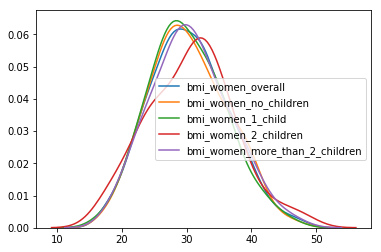

In [117]:
# 4.d. Is the distribution of bmi across women with no children, one child and two children, the same ?
# plotting a multivariate kde plot for bmi of different class of women classified based on the number of children

sns.kdeplot(insurance_data_women['bmi_women_overall'])
sns.kdeplot(insurance_data_women_no_children['bmi_women_no_children'])
sns.kdeplot(insurance_data_women_1_child['bmi_women_1_child'])
sns.kdeplot(insurance_data_women_2_children['bmi_women_2_children'])
sns.kdeplot(insurance_data_women_more_than_2_children['bmi_women_more_than_2_children'])

In [118]:
# 4.d. Is the distribution of bmi across women with no children, one child and two children, the same ?
# Inference drawn: based on the distribution plotted above
# 1. The distribution of BMI of women with no children and one child are similar
# 2. The distribution of BMI of women with 2 children is different from the rest of the population with the modal value shifting 
# to the right
# 3. The distribution of BMI of women with more than 2 children also differs by a smaller margin with a significantly lesser 
# modal value.